# Shady Emad Ahmed

# 1. import libraries

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

# 2. Get images

- read images
- covert from BGR to RGB

In [13]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

# 3. Extract colors from images

In [14]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    #hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    #if (show_chart):
        #plt.figure(figsize = (8, 6))
        #plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors


# 4. Read images from directory

In [15]:
image_directory = "C:/Users/Shady Emad/Desktop/Color Identification in Images/"
Colors = {
    'GREEN': [0,128,0],
    'BLUE': [0,0,255],
    'RED': [255,0,0],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(image_directory):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(image_directory, file)))


# 5. show all images 

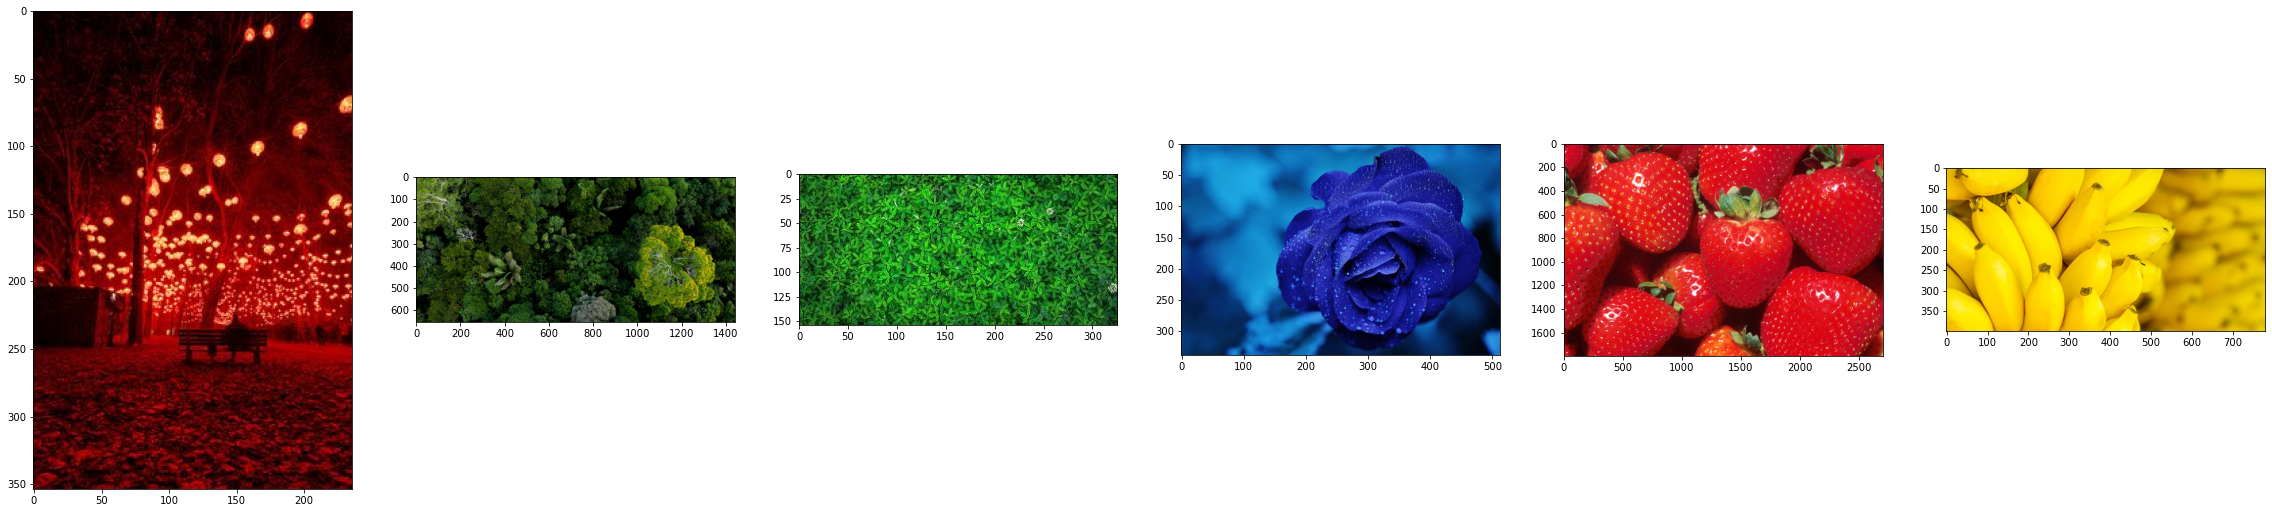

In [16]:
plt.figure(figsize=(40,20))

for i in range(len(images)):
    plt.subplot(1,len(images),i+1)
    plt.imshow(images[i])


# 6. Match images by color

In [17]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

# 7. Show selected images

In [18]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

# Select green images

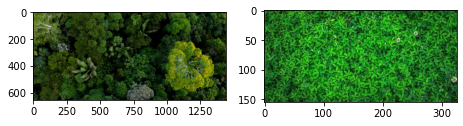

In [19]:
plt.figure(figsize = (20, 10))
show_selected_images(images, Colors['GREEN'], 60, 5)

# Select red images

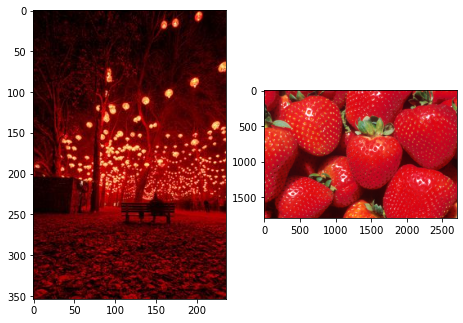

In [20]:
plt.figure(figsize = (20, 10))
show_selected_images(images, Colors['RED'], 60, 5)

# Select blue images

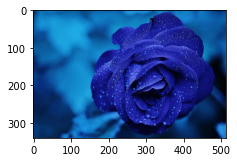

In [21]:
plt.figure(figsize = (20, 10))
show_selected_images(images, Colors['BLUE'], 60, 5)

# Select yellow images

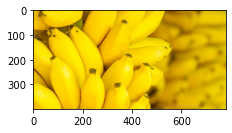

In [22]:
plt.figure(figsize = (20, 10))
show_selected_images(images, Colors['YELLOW'], 60, 5)